In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
##splitting into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
##splitting the train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Using Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10)

In [11]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [12]:
rf.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [15]:
##getting all the 10 estimators
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [16]:
sample_tree = rf.estimators_[4]

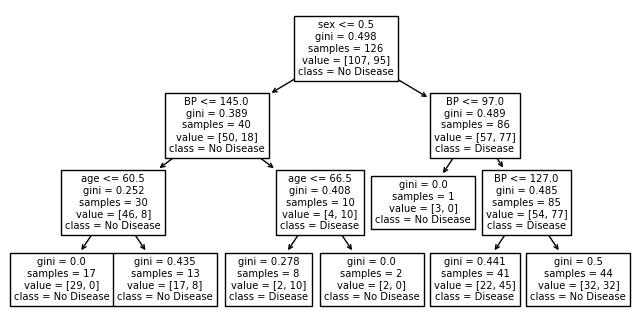

In [22]:
##Plotting the graph
from sklearn import tree
plt.figure(figsize=(8,4))
tree.plot_tree(sample_tree,feature_names=X.columns,class_names=['No Disease','Disease'])
plt.show()

In [23]:
##Lets checkout the second tree also
sample_tree_2 = rf.estimators_[1]

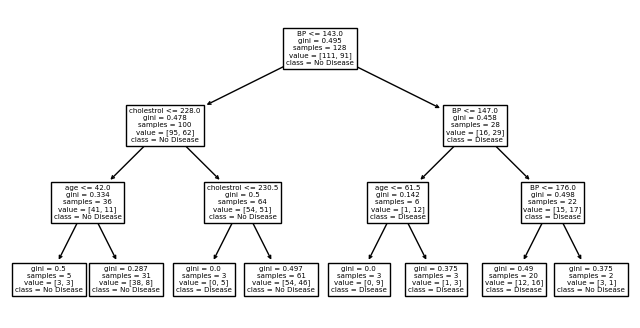

In [24]:
plt.figure(figsize=(8,4))
tree.plot_tree(sample_tree_2,feature_names=X.columns,class_names=['No Disease','Disease'])
plt.show()

In [26]:
##OOB score
rf = RandomForestClassifier(max_depth=3,random_state=42,n_estimators=10,oob_score=True)

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [28]:
##OOB error
rf.oob_score_

0.6534653465346535

In [30]:
(1 - rf.oob_score_)

0.3465346534653465

### Grid Search Cv

In [31]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [33]:
## Creating the parameter grid
params ={
    'max_depth':[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators': [10,30,50,100,200]
}

In [34]:
##Instantiate the Grid search cv method
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_rf,param_grid=params,cv=4,n_jobs=-1,
                          verbose=1,scoring='accuracy')

In [35]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 4.2 s
Wall time: 5min 10s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [37]:
rf_best = grid_search.best_estimator_

In [38]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [39]:
##checking out the accuracy
from sklearn.metrics import accuracy_score
y_pred = rf_best.predict(X_test)
accuracy_score(y_pred,y_test)

0.8235294117647058

In [40]:
y_pred_train = rf_best.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.7970297029702971

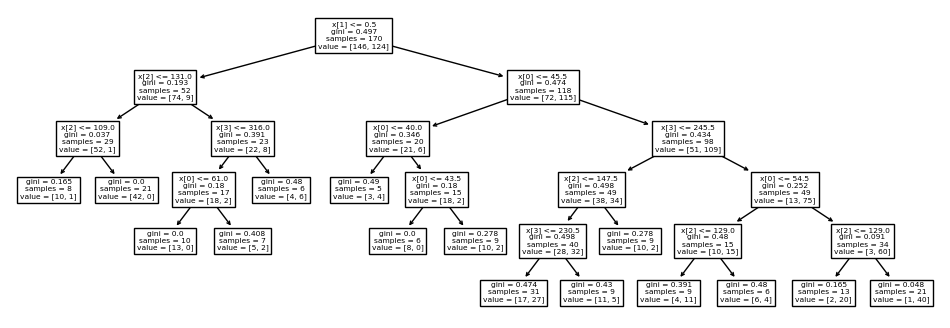

In [42]:
##We can also get a view of the sample estimator here
## rf_best has 30 n_estimators
sample_estimator = rf_best.estimators_[0]
plt.figure(figsize=(12,4))
tree.plot_tree(sample_estimator)
plt.show()

### Variable importance in Random Forests

In [43]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [44]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [46]:
X_train.columns

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [47]:
imp_score = classifier_rf.feature_importances_

In [49]:
pd.DataFrame({'Variable Name':list(X_train.columns),
             'Feature_Imp_Score': imp_score}).sort_values(by='Feature_Imp_Score',ascending=False)

,Variable Name,Feature_Imp_Score
0,age,0.337489
3,cholestrol,0.278671
2,BP,0.242115
1,sex,0.141726


- Here age is the most important feature.